# Modelo de Supervivencia para el Titanic

In [498]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


# Métricas de rendimiento para modelos de clasificación binarios

El rendimiento de los sistemas de clasificación binarios se puede realizar mediante la utilización de las siguientes métricas. Algunas de las más utilizadas son:

* Precisión (Accuracy): $A = \frac{TP + TN}{TP + FP + TN + FN}$
* Exactitud (Precision): $P = \frac{TP}{TP + FP}$
* Exhaustividad (Recall): $R = \frac{TP}{TP + FN}$
* F1: F1 = $\frac{P R}{P + R}$
* Área bajo la curva ROC (ROC AUC)

donde $TP$, $FP$, $TN$, y $FN$ son las componentes de la matriz de confusión

$$
\left|
\begin{array}{cc}
TP & FP \\
FN & TN \\
\end{array}
\right|
$$

In [499]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

def metricas_modelos(y_true, y_pred):
    from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

    # Obtención de matriz de confusión
    confusion_matrix = confusion_matrix(y_true, y_pred)

    print "La matriz de confusión es "
    print confusion_matrix

    print 'Precisión:', accuracy_score(y_true, y_pred)
    print 'Exactitud:', precision_score(y_true, y_pred)
    print 'Exhaustividad:', recall_score(y_true, y_pred)
    print 'F1:', f1_score(y_true, y_pred)

    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)

    print 'AUC:', auc(false_positive_rate, recall)

    plot(false_positive_rate, recall, 'b')
    plot([0, 1], [0, 1], 'r--')
    title('AUC = %0.2f' % roc_auc)

# Conjunto de datos del Titanic

In [507]:
import pandas as pd

titanic = pd.read_csv('titanic.csv', sep = ',')
titanic.head(n=5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Eliminación de variables resultado.

En este conjunto de datos existen variables con informacion a posteriori que deben ser eliminados.

In [501]:
titanic.drop('boat', axis=1, inplace=True)
titanic.drop('body', axis=1, inplace=True)

## Eliminación de los campos nulos.

En este conjunto de datos existen registros en los algunas variables no se han registrado. En este caso procedemos a la eliminación de los registros.

In [502]:
mask = titanic[['age', 'fare']].applymap(lambda x: math.isnan(x))
titanic_not_null = titanic[-mask.any(axis = 1)]

## Seleccion de variables.

Las variables binarias se pueden extraer mediante `get_dummies` de `pandas`

In [508]:
from sklearn.linear_model.logistic import LogisticRegression

# Creación de modelos basados en variables binarias
var_categoricas = ['pclass', 'name', 'sex', 'ticket', 'cabin', 'embarked', 'home.dest']
var_numericas   = ['age', 'sibsp', 'parch', 'fare']
var_target      = titanic_not_null['survived'] == 1

for v_cat in var_categoricas:
    dum_var    = pd.get_dummies(titanic_not_null[v_cat])
    classifier = LogisticRegression().fit(dum_var, var_target)
    y_pred     = classifier.predict(dum_var)
    
    print v_cat
    print 'Precisión:', accuracy_score(y_pred, var_target)
    print 'Exactitud:', precision_score(y_pred, var_target)
    print 'Exhaustividad:', recall_score(y_pred, var_target)
    print 'F1:', f1_score(y_pred, var_target)
    print
    
for v_num in var_numericas:
    god_var = titanic_not_null[v_num].reshape(-1,1)
    classifier = LogisticRegression().fit(god_var, var_target)
    y_pred     = classifier.predict(god_var)
    
    print v_num
    print 'Precisión:', accuracy_score(y_pred, var_target)
    print 'Exactitud:', precision_score(y_pred, var_target)
    print 'Exhaustividad:', recall_score(y_pred, var_target)
    print 'F1:', f1_score(y_pred, var_target)    
    print

pclass
Precisión: 0.666028708134
Exactitud: 0.423887587822
Exhaustividad: 0.637323943662
F1: 0.509142053446

name
Precisión: 0.999043062201
Exactitud: 0.997658079625
Exhaustividad: 1.0
F1: 0.998827667057

sex
Precisión: 0.778947368421
Exactitud: 0.683840749415
Exhaustividad: 0.752577319588
F1: 0.716564417178

ticket
Precisión: 0.91961722488
Exactitud: 0.873536299766
Exhaustividad: 0.925558312655
F1: 0.898795180723

cabin
Precisión: 0.733971291866
Exactitud: 0.370023419204
Exhaustividad: 0.946107784431
F1: 0.531986531987

embarked
Precisión: 0.641148325359
Exactitud: 0.309133489461
Exhaustividad: 0.622641509434
F1: 0.413145539906

home.dest
Precisión: 0.709090909091
Exactitud: 0.36299765808
Exhaustividad: 0.828877005348
F1: 0.504885993485

age
Precisión: 0.591387559809
Exactitud: 0
Exhaustividad: 0
F1: 0

sibsp
Precisión: 0.591387559809
Exactitud: 0
Exhaustividad: 0
F1: 0

parch
Precisión: 0.597129186603
Exactitud: 0.145199063232
Exhaustividad: 0.525423728814
F1: 0.22752293578

fare
Pre

En base a los valores obtenidos de Precision, Exactitud, Exhaustividad y F1, podemos llegar a algunas conclusiones cara a seleccionar variables:

- El nombre es una variable con un sobreajuste maximo y no debemos utilizarla. Se podria procesar para estraer el tratamiento - Mr, Mrs, Miss, Master - por ejemplo y ver si a partir del mismo extraemos informacion adicional, pero tal extraccion trasciende el ambito de este ejercicio.

- El ticket es una variable sujeta a cierto sobreajuste tambien, pero es muy posible que contenga informacion util ya que su codificacion podria estar construida a partir de parametros como la clase, la cabina y otros que pueden aportar informacion adicional a estos.

- La clase y el sexo parecen ser relevantes como intuitivamente creeriamos. En particular el sexo es facil entreveer que es una variable importante.

- La cabina aparece como otra variable relevante. Esto cobra sentido si pensamos que determina la posicion en el barco y por tanto el posible acceso a salidas o botes salvavidas determinados.

- El punto de embarque puede que este relacionada tambien con la posicion en el barco.

- El destino parece una variable sujeta a un elevado sobreajuste en el modelo.

- La edad, numero de hijos, de padres y el precio pagado por el billete son todas variables que no parecen arrojar informacion util. Si se trataran como categorias, el sobreajuste seria maximo, si se tratan linealmente, no parecen aportar mayor informacion.

Un estudio mas exhaustivo, deberia de tratar de aislar mas las variables, pues es facil discernir que exhiste una elevada colinealidad entre muchas de ellas.

# Modelo de clasificación para el Titanic

## Conjunto de variables seleccionado para el modelo

In [504]:
data_model = concatenate((
                            pd.get_dummies(titanic_not_null['ticket']),
                            pd.get_dummies(titanic_not_null['sex']),
                            pd.get_dummies(titanic_not_null['cabin']),
                            pd.get_dummies(titanic_not_null['pclass']),
                            pd.get_dummies(titanic_not_null['embarked']),
                        ), axis = 1)

X_train, X_test, y_train, y_test = train_test_split(data_model, var_target, random_state = 3)

## Regresión logística

La clasificación binaria de eventos se puede realizar a partir de un modelo regresión logística donde se utiliza la expresión
$$
F(x) = \frac{1}{1 + e^{-x}}
$$

### Entrenamiento
Debemos tener cuidado en la seleccion de variables para no sobreajustar el modelo. Un elevado valor AUC en entrenamiento debe corresponderse con un valor parecido en Test, sino habremos incurrido en sobreajuste.

La matriz de confusión es 
[[447  21]
 [ 66 249]]
Precisión: 0.888888888889
Exactitud: 0.922222222222
Exhaustividad: 0.790476190476
F1: 0.851282051282
AUC: 0.872802197802


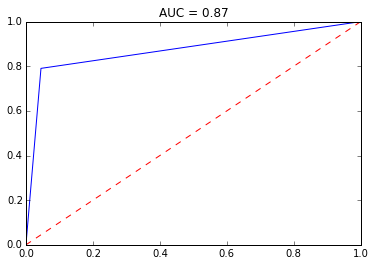

In [505]:
from sklearn.linear_model.logistic import LogisticRegression

classifier = LogisticRegression().fit(X_train, y_train)
y_pred     = classifier.predict(X_train)

metricas_modelos(y_train, y_pred)

### Test
Si la seleccion de variables ha sido la correcta, obtendremos un valor AUC en test parecido al de entrenamiento, señal de que las variables escogidas son adecuadas.

La matriz de confusión es 
[[128  22]
 [ 26  86]]
Precisión: 0.81679389313
Exactitud: 0.796296296296
Exhaustividad: 0.767857142857
F1: 0.781818181818
AUC: 0.810595238095


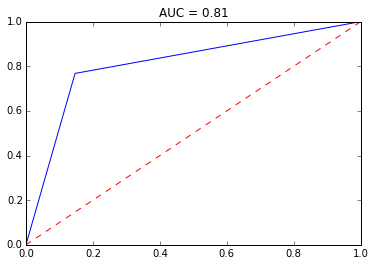

In [506]:
y_pred     = classifier.predict(X_test)

metricas_modelos(y_test, y_pred)

Con las variables escogidas obtenemos el mejor comportamiento en test a la par que simplificamos el modelo. Un tratamiento mas exhaustivo de la colinealidad entre estas variables, asi como el parseado del codigo de ticket o la cabina, podria resultar en variables adicionales que mejoraran el modelo.